# Exercise 4 — Cepstral Techniques

Download the archive “Exercise4.zip” from STiNE. Load the file “filter.mat” into your Matlab workspace, which contains
some vocal tract filter coefficients (stored as a = [a 0 a 1 . . . a M −1 ]). The sampling frequency is f s = 16000 Hz.

In [9]:
#imports
import scipy.io
import numpy as np
from scipy.signal import lfilter, freqz, stft
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import Audio, display

1. Generate a pulse-sequence with a length of 32 ms that represents a voiced excitation source signal with a funda-
mental frequency of 100 Hz, i.e. u = [1 0 . . . 0 1 0 . . . 0 1 0 . . .].

In [10]:
fs = 16000
u = int(fs * 32e-3) * [0]
for i in [j * 160 for j in range(1,4)]:
    u[i] = 1
sl = len(u)
#print(u)

2. Create an artificial speech sound s by filtering the generated excitation source u with the provided vocal tract
filter coefficients a using the function filter(1, a, signal) . Then, apply a Hann window w to s and u. Plot
the amplitude spectrum and the log amplitude spectrum of the vocal tract filter h (defined by the coefficients a),
of the windowed excitation source u w = w ⊗ u, as well as of the windowed filtered signal s w = w ⊗ s, where ⊗
denotes element-wise multiplication. To obtain the spectra, for u w and s w you can simply use fft , while for h,
H = freqz(b,a,N,’whole’) might be a good choice, where N is the length of the signal segment in samples.

512


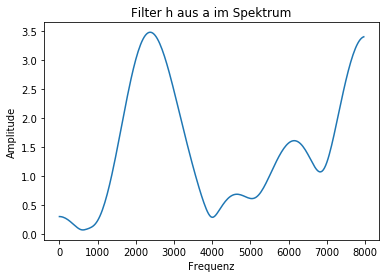

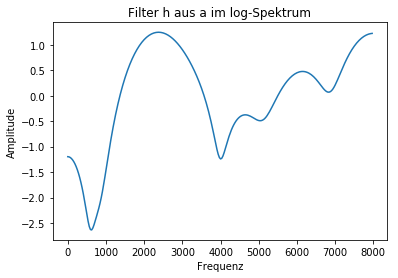

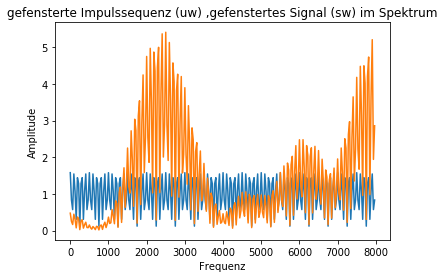

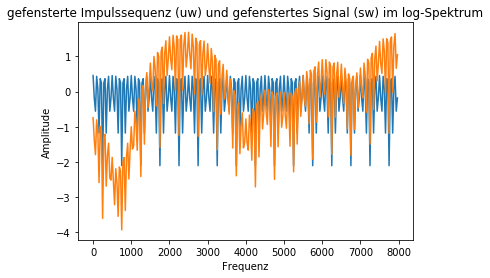

In [11]:
# Fenster Funktion ermitteln
mat = scipy.io.loadmat('filter.mat')
a = mat["a"][0]
#print(mat)

# Frequenz-Domaine
freq_domain = np.fft.fftfreq(sl)[: int (sl/2)] * fs
#fda = range(0,16) 

# modifizierte Signale
s = lfilter(a,1,u)
w = np.hanning(sl)
uw = u * w
sw = s * w

# Spektra
_,h_spectrum = freqz(a, whole=True)
print(len(h_spectrum))
#h_spectrum = np.fft.fft(a)
uw_spectrum = np.fft.fft(uw)
sw_spectrum = np.fft.fft(sw)

plt.title("Filter h aus a im Spektrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[: int(sl/2)])
plt.show()

plt.title("Filter h aus a im log-Spektrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.log(np.abs(h_spectrum)[: int(sl/2)]))
plt.show()

plt.title("gefensterte Impulssequenz (uw) ,gefenstertes Signal (sw) im Spektrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain, np.abs(uw_spectrum)[: int (sl/2)])
plt.plot(freq_domain,np.abs(sw_spectrum)[: int (sl/2)])
plt.show()

plt.title("gefensterte Impulssequenz (uw) und gefenstertes Signal (sw) im log-Spektrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.log(np.abs(uw_spectrum))[: int (sl/2)])
plt.plot(freq_domain,np.log(np.abs(sw_spectrum))[: int (sl/2)])
plt.show()

3.Compute and plot:
1. c s [n]: real cepstrum of the windowed filtered signal s w .
2. c u [n]: real cepstrum of the windowed excitation source u w .
3. c h [n]: real cepstrum of the filter h.

(Hint: if the power of your signal for certain frequency bins is 0, computing log(0) in MATLAB returns -Inf . To
overcome this limitation, you can add the value eps to your sequences prior to computing the logarithm)

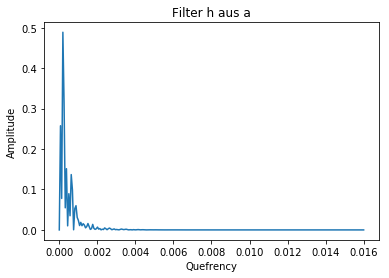

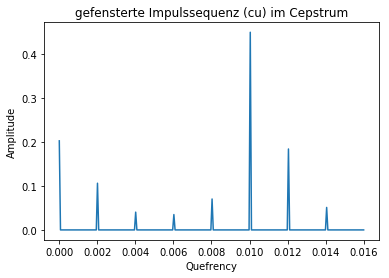

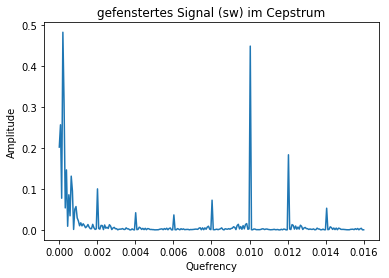

In [4]:
cs = np.fft.ifft(np.log(np.abs(sw_spectrum)))
cu = np.fft.ifft(np.log(np.abs(uw_spectrum)))
ch = np.fft.ifft(np.log(np.abs(h_spectrum)))

quefrency_domain = np.linspace(0,32e-03/2,256)

plt.title("Filter h aus a")
plt.ylabel("Amplitude")
plt.xlabel("Quefrency")
plt.plot(quefrency_domain,np.abs(ch)[0:256])
plt.show()

plt.title("gefensterte Impulssequenz (cu) im Cepstrum")
plt.ylabel("Amplitude")
plt.xlabel("Quefrency")
plt.plot(quefrency_domain,np.abs(cu)[0:256])
plt.show()

plt.title("gefenstertes Signal (sw) im Cepstrum")
plt.ylabel("Amplitude")
plt.xlabel("Quefrency")
plt.plot(quefrency_domain,np.abs(cs)[0:256])
plt.show()



.4. Answer the following questions:

a) Is there any symmetry within the real cepstrum of the signals? Why?

b) Why is the real (and also the complex) cepstrum of any real-valued time-domain signal real-valued?

c) For voiced sounds, a cepstral peak at a distinct position can be observed. Why is that so? Explain how the
position of the peak is related to the fundamental frequency.


a) Ja, eine Symmetrie ist für das Cepstrum des Eingangsignal zum Cepstrum Signal ersichtlich.
Die Filterfunktion ist symmetrisch mit dem ersten Teil des Cepstrum.
Die Addition der Cepstra der Filterfunktion vom Vokaltraktes und des Eingangssignal ergibt das Cepstrum des konstruierten Signales s. Dies gilt aufgrund:
    y = e conv h <=> fft(y) = fft(e) * fft(h) <=> log(fft(y)) = log(fft(e)) + log(fft(h)) 
    <=> ift(log(fft(y))) = ift(log(fft(e))) + ift(log(fft(h)))
    
b)
Wegen der inversen FFT heben sich die imaginären Anteile gegenseitig wieder auf, sodass sie real wertig werden.

c)
Im Cepstrum eines stimmhaften Tones beschreibt der abfallende Teil die Hülle des Signal. Der ausgeprägte Peak, relativ spät, gibt die Grundfrequenz wieder. Eine hohe Quefrenz ist nämlich die Folge von einer frequenziellen Harmonie durch den Eingangssignal. Der ausgeprägte Peak ist korreliert demnach mit der Grundfrequenz.
Mit f = 1/t lässt sich schließlich Grundfrequenz aus dem Cepstrum bestimmen.

5.Using c s [n], estimate the fundamental frequency of your excitation source and compare it to the value you used in
point 1. For this, find the cepstral peak that corresponds to the fundamental frequency. Unfortunately, the values
of the cepstrum in the lowest quefrencies are often much larger than the peak that we are searching for. Thus you
can set the first cepstral coefficients to -Inf before searching for the peak. In this way you can also effectively limit
your maximum search to a quefrency region relevant for human fundamental frequencies. The found peak position
can finally be translated into the fundamental frequency.

In [5]:
modifysw = np.abs(np.copy(cs))[0:256]
modifysw[0:20] = 0
cepstrum_fs = 1 / (modifysw.argmax() * 16e-03 / 256)
print("Grundfrequenz liegt nach Cepstrum etwa bei",cepstrum_fs)

Grundfrequenz liegt nach Cepstrum etwa bei 100.0


6.In speech processing, the actual filter and excitation source are unknown. Based on the theory that the first cepstral
coefficients of c s [n] correspond to the vocal tract h[n] while the remaining ones correspond to the excitation u[n],
write a function [H_est, U_est] = myrceps(c_s,L) with arguments:

c_s Vector containing the cepstral coefficients of the filtered signal c s [n]

L The cut-off quefrency in ms. The cepstral coefficients of c s [n] up to L correspond to the filter

H_est Vector containing the reconstructed spectrum of the filter using the first L coefficients in c s [n]

U_est Vector with the reconstructed spectrum of the excitation source using the remaining coefficients
in c s [n]


This function applies cepstral liftering to c s [n] to estimate the spectrum of the filter and the spectrum of the
excitation. (Hint: take care that you don’t destroy the symmetry of c s [n]!)

a) Reconstruct the spectrum of the filter and excitation using L ∈ {0.5 ms, 1 ms, 1.5 ms, 2 ms, 10 ms, 20 ms}
and compare them with the original spectra, H and U , that you have previously computed. Which value of
L gives the best reconstruction? Explain what you observe and support your observations using appropriate
plots.

b) Name at least one other possibility to obtain an estimate of the vocal tract transfer function H.

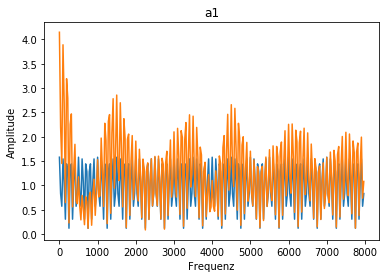

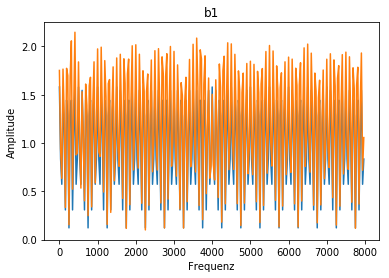

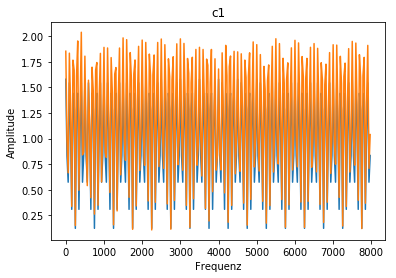

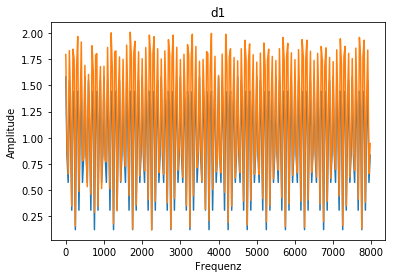

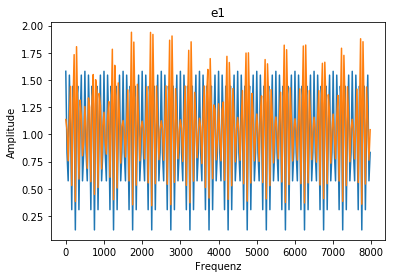

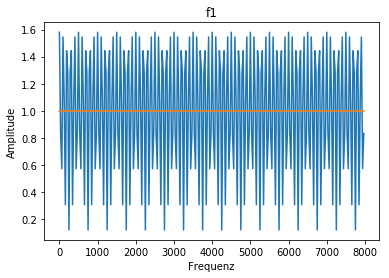

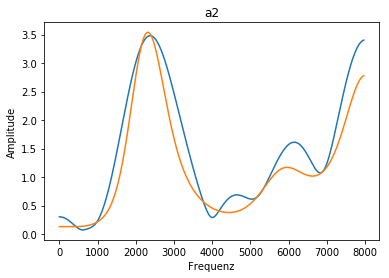

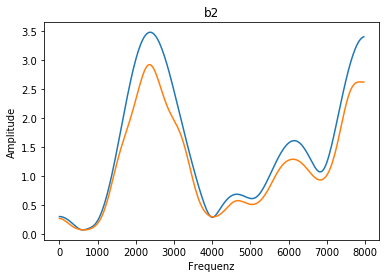

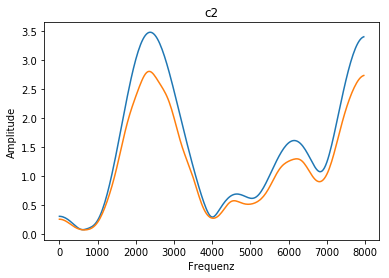

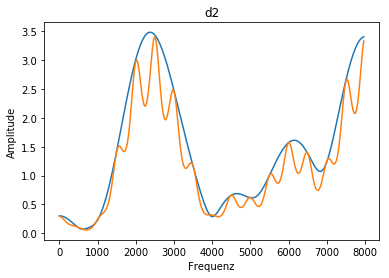

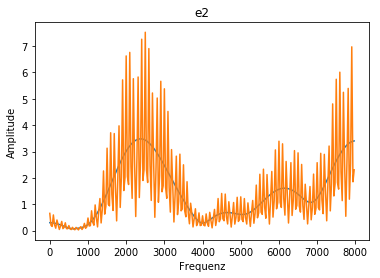

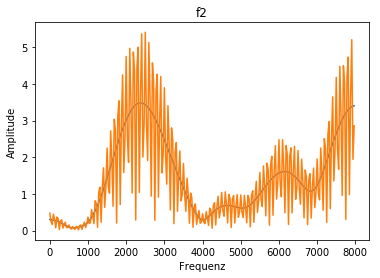

In [6]:
full_quefrency_domain = np.linspace(0,32e-03,512)
def mylifter(c_s,L):
    L_nb = int(L * fs)
    first = np.copy(c_s)
    second = np.copy(c_s)
    first[0:L_nb] = 0
    first[(first.size - L_nb):first.size] = 0
    second[(L_nb+1):(int(second.size-L_nb-1))] = 0
    return first,second

def myrceps(c_s,L):
    first,second = mylifter(c_s,L)
    U_est = np.exp(np.fft.fft(first))
    H_est = np.exp(np.fft.fft(second))
    return H_est, U_est

a2,a1 = myrceps(cs,0.5e-3)
b2,b1 = myrceps(cs,1e-3)
c2,c1 = myrceps(cs,1.5e-3)
d2,d1 = myrceps(cs,2e-3)
e2,e1 = myrceps(cs,10e-3)
f2,f1 = myrceps(cs,20e-3)

plt.title("a1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(a1)[0:256])
plt.show()

plt.title("b1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(b1)[0:256])
plt.show()

plt.title("c1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(c1)[0:256])
plt.show()

plt.title("d1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(d1)[0:256])
plt.show()

plt.title("e1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(e1)[0:256])
plt.show()

plt.title("f1")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(uw_spectrum)[0:256])
plt.plot(freq_domain,np.abs(f1)[0:256])
plt.show()

plt.title("a2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(a2)[0:256])
plt.show()

plt.title("b2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(b2)[0:256])
plt.show()

plt.title("c2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(c2)[0:256])
plt.show()

plt.title("d2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(d2)[0:256])
plt.show()

plt.title("e2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(e2)[0:256])
plt.show()

plt.title("f2")
plt.ylabel("Amplitude")
plt.xlabel("Frequenz")
plt.plot(freq_domain,np.abs(h_spectrum)[0:256])
plt.plot(freq_domain,np.abs(f2)[0:256])
plt.show()





a) -Übereinanderlegen von Vokaltract und vermeintlichen Vokaltract.
   -Übereinanderlegen von Excitations und vermeintlichen Excitations.
-> 
Die Version b und c sind die besten Kandidaten. D.h. 1ms und 1.5 ms.
b) LPC ist eine andere Möglichkeit.

7Load the file speech1.wav from the last exercise sessions to your workspace. Split the signal into segments of 32 ms
overlapping by 16 ms.

a) Plot the logarithmic spectrogram as well as the real cepstrogram of the speech signal using imagesc() .

b) Finally, plot the results after liftering (for your optimal value of L), that is the estimated spectral envelope
H est and the spectrogram of the estimated excitation U est .

In [7]:
import wave
import sys
import sounddevice as sd

#read-Objekte
file_speech1 = wave.open('./Audio/speech1.wav','r')

#Abtastwerte
speech1_samples = np.frombuffer(file_speech1.readframes(-1),'int16')

#Abtastrate
speech1_fs = file_speech1.getframerate()

#Time-Domain
speech1_time = np.linspace(0, len(speech1_samples)/speech1_fs, num=len(speech1_samples))

#sound speech1
sd.play(speech1_samples, speech1_fs)

513
513


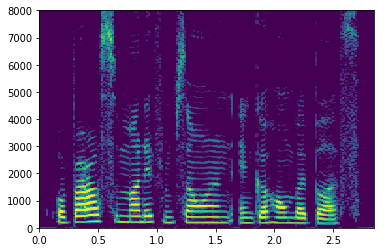

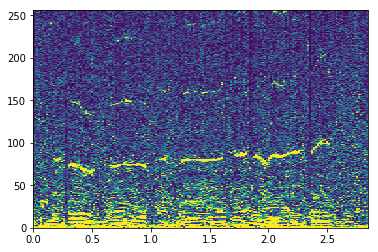

In [104]:
import matplotlib as mpl

f,t,Zxx = stft(speech1_samples,fs=speech1_fs,window='hann',nperseg=32e-3*speech1_fs,noverlap=16e-3 * speech1_fs)
#Zxx ist nicht das vollständige fft... also:
Zx = np.transpose([np.append(i,i[1:][::-1]) for i in np.transpose(Zxx)])
print(len(Zx))
print(len(np.append(-1 * f,f[1:][::-1])))
plt.pcolormesh(t, f, np.log(np.abs(Zx[:len(Zxx)])),vmin=0, vmax=np.sqrt(20))
plt.show()
Cx = np.transpose([ np.fft.ifft(np.log(np.abs(i))) for i in np.transpose(Zx)])
plt.pcolormesh(t, f * 32e-3, np.abs(Cx[:len(Zxx)]),vmin=0, vmax=0.09)
plt.show()

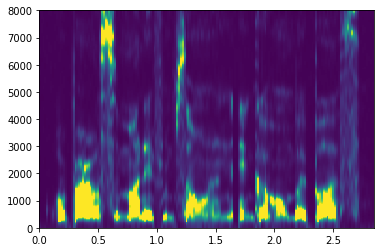

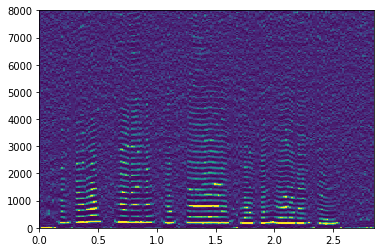

In [128]:
H = np.transpose([myrceps(i,1.5e-3)[0] for i in np.transpose(Cx)])
plt.pcolormesh(t, f , np.abs(H[:len(Zxx)]),vmin=0, vmax=10)
plt.show()
U = np.transpose([myrceps(i,1.5e-3)[1] for i in np.transpose(Cx)])
plt.pcolormesh(t, f , np.abs(U[:len(Zxx)]),vmin=0, vmax=10)
plt.show()